In [1]:
# imports, global settings

import numpy as np
import pandas as pd

import sklearn as sk
import sklearn.feature_extraction
import sklearn.preprocessing
import sklearn.linear_model

import IPython as IP

import matplotlib.pyplot as plt
%matplotlib inline

import pylab
# print (pylab.rcParams.keys())
pylab.rcParams['figure.figsize'] = (18.0, 8.0)
pylab.rcParams['figure.facecolor'] = "white"
pylab.rcParams['axes.facecolor'] = "white"
pylab.rcParams['font.family'] = "sans"

import matplotlib
matplotlib.style.use('ggplot') # temporary for incompatibility of pandas with matplotlib
# pd.options.display.mpl_style = 'default'

pd.set_option('display.max_rows', 100)

In [2]:
% load_ext autoreload
% autoreload 2

In [3]:
# % install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
# % load_ext autotime

In [4]:
from read_utils import train_test, user_item_matrix
# from recommender import MostPopularRecommender
from pandas.tseries.offsets import *
import seaborn as sns
from eval_metrics import top_n
import pandas as pd
import numpy
import math

Функция rolling_crossval(df, Recommender, k, step, fold_size, start_offset, time_func, time_func_params)  возвращает список точностей и дат конца тестового сета

df - датафрейм с данными

Recommender - класс рекомендатора

k - параметр рекомендатора (число кластеров)

step - шаг, с которым сдвигается старт теста

fold_size - размер тест сета

start_offset - дата старта первого теста получается вычитанием этого оффсета из текущей

time_func - callable следующей сигнатуры - time_func(order_date, time_func_params). Возвращает значение, прибавляемое в user_item матрицу

time_func_params - параметр функции взвешивания, если много коэффициентов - стоит положить дикт

In [5]:
from ts_crossval import rolling_crossval, rolling_crossval_draft

Пример использования кроссвалидации и функции взвешивания

Взвешивание экспоненциальное приведено в качестве примера, дефолтное поведение кроссвалидатора - работать без взвешивания

In [6]:
import sys
sys.stdout = open('logs', 'w')

In [7]:
%%time

from recommender import ClusteringRecommender, SVDRecommender, MostPopularRecommender, SecondaryMostPopularRecommender

input_file_path = "../input/orders_items_registrations.csv"
df = pd.read_csv(input_file_path, encoding="utf-8", low_memory=False)
df['order_date'] = pd.to_datetime(df['order_date'])
cur_time = df["order_date"].max()

def time_func(order_time, param):
    tdelta = cur_time - order_time
    tdelta = tdelta.days
    return math.exp(param*tdelta)

with open('test', 'w') as f:
    f.write('')
    


# svd_accs = rolling_crossval(df, SVDRecommender, k=6, step=DateOffset(months=0, days=14), 
#                             start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)
# most_pop_accs = rolling_crossval(df, MostPopularRecommender, k=6, step=DateOffset(months=0, days=14), 
#                                  start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)
# clustering_accs = rolling_crossval(df, ClusteringRecommender, k=6, step=DateOffset(months=0, days=14), 
#                                    start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)

rolling_crossval_draft(input_file_path, cur_time, SVDRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, MostPopularRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)
rolling_crossval_draft(input_file_path, cur_time, SecondaryMostPopularRecommender, k=6, step=DateOffset(months=1, days=0), 
                       start_offset=DateOffset(months=13), time_func_params=0.5)

# clustering_accs = rolling_crossval_draft(input_file_path, cur_time, ClusteringRecommender, k=6, step=DateOffset(months=1, days=0), 
#                                    start_offset=DateOffset(months=13), time_func_params=0.5)

read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  group.sort('order_date', ascending=True)
read_utils.py:184: FutureWarning: sort(co

JoblibAttributeError: JoblibAttributeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7fa06c22b130, file "/...2.7/dist-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7fa06c22b130, file "/...2.7/dist-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    591         
    592         If a global instance already exists, this reinitializes and starts it
    593         """
    594         app = cls.instance(**kwargs)
    595         app.initialize(argv)
--> 596         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    597 
    598 #-----------------------------------------------------------------------------
    599 # utility functions, for convenience
    600 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    437         
    438         if self.poller is not None:
    439             self.poller.start()
    440         self.kernel.start()
    441         try:
--> 442             ioloop.IOLoop.instance().start()
    443         except KeyboardInterrupt:
    444             pass
    445 
    446 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-06T16:13:27.578738', u'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', u'msg_type': u'execute_request', u'session': u'B1AF9702AEC649029C6EDBFF368840A7', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['B1AF9702AEC649029C6EDBFF368840A7']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-06T16:13:27.578738', u'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', u'msg_type': u'execute_request', u'session': u'B1AF9702AEC649029C6EDBFF368840A7', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['B1AF9702AEC649029C6EDBFF368840A7'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-08-06T16:13:27.578738', u'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', u'msg_type': u'execute_request', u'session': u'B1AF9702AEC649029C6EDBFF368840A7', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'21CE9686751D4B0F8E6B972C879537C5', 'msg_type': u'execute_request', 'parent_header': {}})
    386         if not silent:
    387             self.execution_count += 1
    388             self._publish_execute_input(code, parent, self.execution_count)
    389 
    390         reply_content = self.do_execute(code, silent, store_history,
--> 391                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    392 
    393         # Flush output before sending the reply.
    394         sys.stdout.flush()
    395         sys.stderr.flush()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    194 
    195         reply_content = {}
    196         # FIXME: the shell calls the exception handler itself.
    197         shell._reply_content = None
    198         try:
--> 199             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)'
        store_history = True
        silent = False
    200         except:
    201             status = u'error'
    202             # FIXME: this code right now isn't being used yet by default,
    203             # because the run_cell() call above directly fires off exception

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'%%time\n\nfrom recommender import ClusteringRe...set=DateOffset(months=13), time_func_params=0.5)', store_history=True, silent=False, shell_futures=True)
   2700                 self.displayhook.exec_result = result
   2701 
   2702                 # Execute the user code
   2703                 interactivity = "none" if silent else self.ast_node_interactivity
   2704                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2705                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2706                 
   2707                 self.last_execution_succeeded = not has_raised
   2708 
   2709                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-7-abcb3158f983>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<class 'IPython.core.interactiveshell.ExecutionResult'> instance)
   2810                     return True
   2811 
   2812             for i, node in enumerate(to_run_interactive):
   2813                 mod = ast.Interactive([node])
   2814                 code = compiler(mod, cell_name, "single")
-> 2815                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fa0037a69b0, file "<ipython-input-7-abcb3158f983>", line 1>
        result = <class 'IPython.core.interactiveshell.ExecutionResult'> instance
   2816                     return True
   2817 
   2818             # Flush softspace
   2819             if softspace(sys.stdout, 0):

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fa0037a69b0, file "<ipython-input-7-abcb3158f983>", line 1>, result=<class 'IPython.core.interactiveshell.ExecutionResult'> instance)
   2864         outflag = 1  # happens in more places, so it's easier as default
   2865         try:
   2866             try:
   2867                 self.hooks.pre_run_code_hook()
   2868                 #rprint('Running code', repr(code_obj)) # dbg
-> 2869                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fa0037a69b0, file "<ipython-input-7-abcb3158f983>", line 1>
        self.user_global_ns = {'BDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BMonthBegin': <class 'pandas.tseries.offsets.BusinessMonthBegin'>, 'BMonthEnd': <class 'pandas.tseries.offsets.BusinessMonthEnd'>, 'BQuarterBegin': <class 'pandas.tseries.offsets.BQuarterBegin'>, 'BQuarterEnd': <class 'pandas.tseries.offsets.BQuarterEnd'>, 'BYearBegin': <class 'pandas.tseries.offsets.BYearBegin'>, 'BYearEnd': <class 'pandas.tseries.offsets.BYearEnd'>, 'BusinessDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BusinessHour': <class 'pandas.tseries.offsets.BusinessHour'>, 'CBMonthBegin': <class 'pandas.tseries.offsets.CustomBusinessMonthBegin'>, ...}
        self.user_ns = {'BDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BMonthBegin': <class 'pandas.tseries.offsets.BusinessMonthBegin'>, 'BMonthEnd': <class 'pandas.tseries.offsets.BusinessMonthEnd'>, 'BQuarterBegin': <class 'pandas.tseries.offsets.BQuarterBegin'>, 'BQuarterEnd': <class 'pandas.tseries.offsets.BQuarterEnd'>, 'BYearBegin': <class 'pandas.tseries.offsets.BYearBegin'>, 'BYearEnd': <class 'pandas.tseries.offsets.BYearEnd'>, 'BusinessDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BusinessHour': <class 'pandas.tseries.offsets.BusinessHour'>, 'CBMonthBegin': <class 'pandas.tseries.offsets.CustomBusinessMonthBegin'>, ...}
   2870             finally:
   2871                 # Reset our crash handler in place
   2872                 sys.excepthook = old_excepthook
   2873         except SystemExit as e:

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/<ipython-input-7-abcb3158f983> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 get_ipython().run_cell_magic(u'time', u'', u'\nfrom recommender import ClusteringRecommender, SVDRecommender, MostPopularRecommender, SecondaryMostPopularRecommender\n\ninput_file_path = "../input/orders_items_registrations.csv"\ndf = pd.read_csv(input_file_path, encoding="utf-8", low_memory=False)\ndf[\'order_date\'] = pd.to_datetime(df[\'order_date\'])\ncur_time = df["order_date"].max()\n\ndef time_func(order_time, param):\n    tdelta = cur_time - order_time\n    tdelta = tdelta.days\n    return math.exp(param*tdelta)\n\nwith open(\'test\', \'w\') as f:\n    f.write(\'\')\n    \n\n\n# svd_accs = rolling_crossval(df, SVDRecommender, k=6, step=DateOffset(months=0, days=14), \n#                             start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)\n# most_pop_accs = rolling_crossval(df, MostPopularRecommender, k=6, step=DateOffset(months=0, days=14), \n#                                  start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)\n# clustering_accs = rolling_crossval(df, ClusteringRecommender, k=6, step=DateOffset(months=0, days=14), \n#                                    start_offset=DateOffset(months=6), time_func=time_func, time_func_params=0.5)\n\nrolling_crossval_draft(input_file_path, cur_time, SVDRecommender, k=6, step=DateOffset(months=1, days=0), \n                       start_offset=DateOffset(months=13), time_func_params=0.5)\nrolling_crossval_draft(input_file_path, cur_time, MostPopularRecommender, k=6, step=DateOffset(months=1, days=0), \n                       start_offset=DateOffset(months=13), time_func_params=0.5)\nrolling_crossval_draft(input_file_path, cur_time, SecondaryMostPopularRecommender, k=6, step=DateOffset(months=1, days=0), \n                       start_offset=DateOffset(months=13), time_func_params=0.5)\nclustering_accs = rolling_crossval_draft(input_file_path, cur_time, ClusteringRecommender, k=6, step=DateOffset(months=1, days=0), \n                                   start_offset=DateOffset(months=13), time_func_params=0.5)')
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name=u'time', line=u'', cell=u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)')
   2098             # This will need to be updated if the internal calling logic gets
   2099             # refactored, or else we'll be expanding the wrong variables.
   2100             stack_depth = 2
   2101             magic_arg_s = self.var_expand(line, stack_depth)
   2102             with self.builtin_trap:
-> 2103                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = u''
        cell = u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)'
   2104             return result
   2105 
   2106     def find_line_magic(self, magic_name):
   2107         """Find and return a line magic by name.

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/<decorator-gen-59> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)', local_ns=None)
      1 
----> 2 
      3 
      4 
      5 
      6 
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/magic.py in <lambda>(f=<function time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, u'', u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)', None), **k={})
    183     validate_type(magic_kind)
    184 
    185     # This is a closure to capture the magic_kind.  We could also use a class,
    186     # but it's overkill for just that one bit of state.
    187     def magic_deco(arg):
--> 188         call = lambda f, *a, **k: f(*a, **k)
        f = <function time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, u'', u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)', None)
        k = {}
    189 
    190         if callable(arg):
    191             # "Naked" decorator call (just @foo, no args)
    192             func = arg

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'\nfrom recommender import ClusteringRecommende...set=DateOffset(months=13), time_func_params=0.5)', local_ns=None)
   1171             st = clock2()
   1172             out = eval(code, glob, local_ns)
   1173             end = clock2()
   1174         else:
   1175             st = clock2()
-> 1176             exec(code, glob, local_ns)
        code = <code object <module> at 0x7fa0037a6b30, file "<timed exec>", line 2>
        glob = {'BDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BMonthBegin': <class 'pandas.tseries.offsets.BusinessMonthBegin'>, 'BMonthEnd': <class 'pandas.tseries.offsets.BusinessMonthEnd'>, 'BQuarterBegin': <class 'pandas.tseries.offsets.BQuarterBegin'>, 'BQuarterEnd': <class 'pandas.tseries.offsets.BQuarterEnd'>, 'BYearBegin': <class 'pandas.tseries.offsets.BYearBegin'>, 'BYearEnd': <class 'pandas.tseries.offsets.BYearEnd'>, 'BusinessDay': <class 'pandas.tseries.offsets.BusinessDay'>, 'BusinessHour': <class 'pandas.tseries.offsets.BusinessHour'>, 'CBMonthBegin': <class 'pandas.tseries.offsets.CustomBusinessMonthBegin'>, ...}
        local_ns = None
   1177             end = clock2()
   1178             out = None
   1179         wall_end = wtime()
   1180         # Compute actual times and report

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/<timed exec> in <module>()
     28 
     29 
     30 
     31 
     32 
---> 33 
     34 
     35 
     36 
     37 

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/ts_crossval.py in rolling_crossval_draft(input_file_path='../input/orders_items_registrations.csv', cur_time=Timestamp('2016-08-04 20:47:19'), RecommenderClass=<class recommender.ClusteringRecommender>, k=6, step=<DateOffset: kwds={'months': 1, 'days': 0}>, fold_size=<DateOffset: kwds={'months': 1}>, start_offset=<DateOffset: kwds={'months': 13}>, time_func=<function <lambda>>, time_func_params=0.5)
     58 
     59     # print last_step_start, current_dates, current_date
     60 
     61     jl.Parallel(n_jobs=-1)(jl.delayed(calc)(fold_size, input_file_path, current_date,
     62                                             RecommenderClass, k)
---> 63                            for current_date in current_dates)
        current_date = Timestamp('2016-08-04 20:47:19')
        current_dates = [Timestamp('2015-08-04 20:47:19'), Timestamp('2015-09-04 20:47:19'), Timestamp('2015-10-04 20:47:19'), Timestamp('2015-11-04 20:47:19'), Timestamp('2015-12-04 20:47:19'), Timestamp('2016-01-04 20:47:19'), Timestamp('2016-02-04 20:47:19'), Timestamp('2016-03-04 20:47:19'), Timestamp('2016-04-04 20:47:19'), Timestamp('2016-05-04 20:47:19'), Timestamp('2016-06-04 20:47:19'), Timestamp('2016-07-04 20:47:19')]
     64     # fold_size, df, current_date, fold_accuracies, RecommenderClass, k
     65     # jl.Parallel(n_jobs=-1)(jl.delayed(process_groups)(i, end_date) for i in range(n_buckets))
     66 
     67     # while current_date <= last_step_start:

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    805             if pre_dispatch == "all" or n_jobs == 1:
    806                 # The iterable was consumed all at once by the above for loop.
    807                 # No need to wait for async callbacks to trigger to
    808                 # consumption.
    809                 self._iterating = False
--> 810             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    811             # Make sure that we get a last message telling us we are done
    812             elapsed_time = time.time() - self._start_time
    813             self._print('Done %3i out of %3i | elapsed: %s finished',
    814                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
AttributeError                                     Sat Aug  6 16:14:01 2016
PID: 2291                                    Python 2.7.12: /usr/bin/python
...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function calc>
        args = (<DateOffset: kwds={'months': 1}>, '../input/orders_items_registrations.csv', Timestamp('2015-08-04 20:47:19'), <class recommender.ClusteringRecommender>, 6)
        kwargs = {}
        self.items = [(<function calc>, (<DateOffset: kwds={'months': 1}>, '../input/orders_items_registrations.csv', Timestamp('2015-08-04 20:47:19'), <class recommender.ClusteringRecommender>, 6), {})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/ts_crossval.py in calc(fold_size=<DateOffset: kwds={'months': 1}>, input_file_path='../input/orders_items_registrations.csv', current_date=Timestamp('2015-08-04 20:47:19'), RecommenderClass=<class recommender.ClusteringRecommender>, k=6)
     20 
     21     print RecommenderClass, len(train), len(test)
     22 
     23     X, index_user_id, index_set_id = user_item_matrix_time_weighted(train, time_func=lambda x, p: 1, time_func_params=0)
     24     rec = RecommenderClass(X, train, index_user_id, index_set_id, k=k)
---> 25     accuracy = evaluate(rec, test)
        accuracy = undefined
        evaluate = <function evaluate>
        rec = <recommender.ClusteringRecommender instance>
        test =        order_id  user_id          order_date ord... 11:01:28            m  

[402 rows x 41 columns]
     26     train_end_date = train["order_date"].max()
     27 
     28     # fold_accuracies.append((train_end_date, accuracy))
     29 

...........................................................................
/home/user/dtuzov/recommender/clustering_recommender/recommender.py in evaluate(rec=<recommender.ClusteringRecommender instance>, test=       order_id  user_id          order_date ord... 11:01:28            m  

[402 rows x 41 columns], metric=<function top_n>)
     21 def evaluate(rec, test, metric=top_n):
     22     acc = []
     23     for user in test["user_id"].unique():
     24         user_actual = list(test[test["user_id"] == user]["item_set_id"])
     25         if user_actual != []:
---> 26             acc.append(metric(user_actual, rec.predict(user)))
        acc.append = <built-in method append of list object>
        metric = <function top_n>
        user_actual = [466]
        rec.predict = undefined
        user = 16910
     27     return sum(acc) / len(acc)
     28 
     29 
     30 class ClusteringRecommender():

AttributeError: ClusteringRecommender instance has no attribute 'predict'
___________________________________________________________________________

In [8]:
from json import loads

fold_accuracies = list()
with open('test') as f:
    for l in f.readlines():
        fold_accuracies.append(loads(l))
fold_accuracies = pd.DataFrame(fold_accuracies).sort_values('train_end_date')

In [12]:
fold_accuracies.set_index('train_end_date')

RecommenderClass  accuracy
train_end_date                                                            
2015-07-04 17:39:24                   recommender.SVDRecommender  0.290323
2015-07-04 17:39:24  recommender.SecondaryMostPopularRecommender  0.439516
2015-07-04 17:39:24           recommender.MostPopularRecommender  0.439516
2015-08-04 20:31:33                   recommender.SVDRecommender  0.260394
2015-08-04 20:31:33  recommender.SecondaryMostPopularRecommender  0.299781
2015-08-04 20:31:33           recommender.MostPopularRecommender  0.293217
2015-09-04 20:34:33                   recommender.SVDRecommender  0.262537
2015-09-04 20:34:33  recommender.SecondaryMostPopularRecommender  0.380531
2015-09-04 20:34:33           recommender.MostPopularRecommender  0.342183
2015-10-04 20:43:21                   recommender.SVDRecommender  0.239247
2015-10-04 20:43:21  recommender.SecondaryMostPopularRecommender  0.276882
2015-10-04 20:43:21           recommender.MostPopularRecommender  0.252688
2015-11-04 20:03:55                   recommender.SVDRecommender  0.157171
2015-11-04 20:03:55  recommender.SecondaryMostPopularRecommender  0.202358
2015-11-04 20:03:55           recommender.MostPopularRecommender  0.198428
2015-12-03 23:15:15  recommender.SecondaryMostPopularRecommender  0.217510
2015-12-03 23:15:15           recommender.MostPopularRecommender  0.262654
2015-12-03 23:15:15                   recommender.SVDRecommender  0.198358
2016-01-03 23:34:36           recommender.MostPopularRecommender  0.487124
2016-01-03 23:34:36  recommender.SecondaryMostPopularRecommender  0.437768
2016-01-03 23:34:36                   recommender.SVDRecommender  0.309013
2016-02-04 18:50:18           recommender.MostPopularRecommender  0.481928
2016-02-04 18:50:18  recommender.SecondaryMostPopularRecommender  0.500000
2016-02-04 18:50:18                   recommender.SVDRecommender  0.339357
2016-03-04 19:07:12                   recommender.SVDRecommender  0.194667
2016-03-04 19:07:12           recommender.MostPopularRecommender  0.194667
2016-03-04 19:07:12  recommender.SecondaryMostPopularRecommender  0.221333
2016-04-04 20:09:02           recommender.MostPopularRecommender  0.327747
2016-04-04 20:09:02  recommender.SecondaryMostPopularRecommender  0.303538
2016-04-04 20:09:02                   recommender.SVDRecommender  0.128492
2016-05-04 20:30:11  recommender.SecondaryMostPopularRecommender  0.282651
2016-05-04 20:30:11                   recommender.SVDRecommender  0.222222
2016-05-04 20:30:11           recommender.MostPopularRecommender  0.345029
2016-06-04 18:47:22           recommender.MostPopularRecommender  0.186242
2016-06-04 18:47:22                   recommender.SVDRecommender  0.145973
2016-06-04 18:47:22  recommender.SecondaryMostPopularRecommender  0.137584

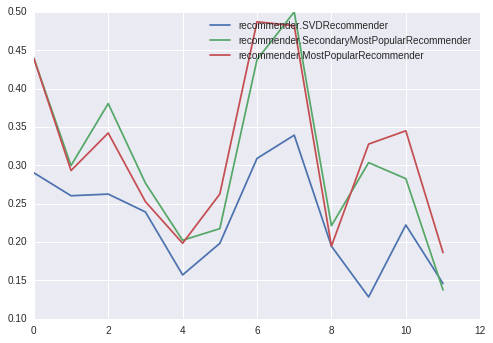

In [23]:
for recommender in fold_accuracies.RecommenderClass.unique():
    data = fold_accuracies[fold_accuracies.RecommenderClass == recommender].reset_index()
    plt.plot(data.accuracy, label=recommender)

plt.legend()
plt.show()

In [10]:
fold_accuracies.groupby("RecommenderClass").accuracy.mean()

RecommenderClass
recommender.MostPopularRecommender             0.317619
recommender.SVDRecommender                     0.228979
recommender.SecondaryMostPopularRecommender    0.308288
Name: accuracy, dtype: float64

In [10]:
# sns.plt.plot([i for i, val in enumerate(most_pop_accs)], [i[1] for i in most_pop_accs], "r")
# sns.plt.plot([i for i, val in enumerate(svd_accs)], [i[1] for i in svd_accs], 'g')
# sns.plt.plot([i for i, val in enumerate(clustering_accs)], [i[1] for i in clustering_accs], 'b')

# sns.plt.show()